# libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("cleaned_data.csv",index_col=False)

In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,name,description,cuisine,course,diet,prep_time,instructions,file_name,ingredients_clean
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,Total in 30 M,"To begin making the Doddapatre Tambuli, first ...",Doddapatre_Tambuli_Recipe_Karuveppilai_Thayir_...,"4 cups Indian borage (Doddapatre) , cleaned an..."
1,Fish Tandoori Recipe,Have you ever tried out fish tandoori? Trust m...,North Indian Recipes,Appetizer,High Protein Non Vegetarian,Total in 80 M,"To begin making the Fish Tandoori recipe, keep...",Fish_Tandoori.jpg,"1 Fish , nicely washed with bones on (I used P..."
2,Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...,Arbi Shimla Mirch Sabzi Recipe is a variation ...,North Indian Recipes,Main Course,No Onion No Garlic (Sattvic),Total in 55 M,To begin making the Arbi Shimla Mirch Sabzi Re...,Simla_Mirchi_Arbi_Sabzi_Recipe__Capsicum__Colo...,300 grams Colocasia root (Arbi) 1 Green Bell P...
3,Ambur Style Brinjal Curry Recipe,Brinjal Curry is prepared in different ways in...,Indian,Lunch,Vegetarian,Total in 20 M,To begin making the Ambur Style Brinjal Curry ...,Brinjal_curry_for_Biryani.jpg,5 Brinjal (Baingan / Eggplant) 1 Onion 2 Tomat...
4,Mavinakayi Menasinakai Curry Recipe - Raw Man...,Mangalorean Mavinakayi Menasinakai Curry Recip...,Mangalorean,Side Dish,Vegetarian,Total in 35 M,To begin making Mangalorean Mavinakayi Menasin...,Raw_Mango_Coconut_Curry__Mavinakayi_Menasinaka...,"1 cup Mango (Raw) , diced 2 tablespoons Jagger..."


In [5]:
# Dropping rows with NaN values
df.dropna(inplace=True)


In [6]:
df.columns

Index(['name', 'description', 'cuisine', 'course', 'diet', 'prep_time',
       'instructions', 'file_name', 'ingredients_clean'],
      dtype='object')

In [7]:
df['file_name'][0]

'Doddapatre_Tambuli_Recipe_Karuveppilai_Thayir_Pachadi-1.jpg'

In [8]:
df['cuisine'].unique()

array(['Indian', 'North Indian Recipes', 'Mangalorean', 'Kerala Recipes',
       'Konkan', 'South Indian Recipes', 'Tamil Nadu', 'Bengali Recipes',
       'Andhra', 'Coorg', 'Hyderabadi', 'Kashmiri', 'Punjabi',
       'Gujarati Recipes\ufeff', 'Coastal Karnataka', 'Karnataka',
       'Goan Recipes', 'Sichuan', 'Udupi', 'Chettinad',
       'Maharashtrian Recipes', 'Mughlai', 'Malvani',
       'North East India Recipes', 'Rajasthani', 'Parsi Recipes',
       'Bihari', 'Awadhi', 'North Karnataka', 'Assamese', 'Pakistani',
       'Himachal', 'Middle Eastern', 'Oriya Recipes',
       'Uttarakhand-North Kumaon ', 'Lucknowi', 'Sindhi', 'Indo Chinese',
       'Uttar Pradesh', 'Kongunadu', 'Chinese', 'Haryana',
       'South Karnataka', 'Fusion', 'Malabar', 'Nepalese', 'Continental',
       'Jharkhand', 'Sri Lankan', 'Thai', 'Arab', 'Nagaland', 'Afghan',
       'Asian'], dtype=object)

In [9]:
df['course'].unique()

array(['Side Dish', 'Appetizer', 'Main Course', 'Lunch', 'Dinner',
       'Dessert', 'Indian Breakfast', 'North Indian Breakfast',
       'South Indian Breakfast', 'World Breakfast', 'One Pot Dish',
       'Snack', 'Brunch'], dtype=object)

In [10]:
df['diet'].unique()

array(['Vegetarian', 'High Protein Non Vegetarian',
       'No Onion No Garlic (Sattvic)', 'Non Vegeterian', 'Eggetarian',
       'Diabetic Friendly', 'High Protein Vegetarian', 'Gluten Free',
       'Vegan'], dtype=object)

In [11]:
# Selecting only 1000 rows
df=df[:1000]

In [12]:
len(df['course'].unique())

13

In [13]:
df['ingredients_clean'][0]

'4 cups Indian borage (Doddapatre) , cleaned and washed 1/2 cup Curd (Dahi / Yogurt) 1 tablespoon Cumin seeds (Jeera) 1/2 teaspoon Whole Black Peppercorns 1/4 cup Dessicated Coconut Salt , to taste 2 tablespoons Ghee'

In [14]:
df.shape

(1000, 9)

# Libraries

In [15]:
import pandas as pd
import numpy as np
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = 'data'

# Load your dataset from a CSV file

# Split the data into training (70%), validation (10%), and testing (20%)
train_split = 0.7
val_split = 0.1
test_split = 0.2

train_df = df.sample(frac=train_split, random_state=42)
remaining_df = df.drop(train_df.index)
val_df = remaining_df.sample(frac=val_split / (val_split + test_split), random_state=42)
test_df = remaining_df.drop(val_df.index)

# Determine the number of unique classes in the entire dataset
num_classes = len(df['course'].unique())
print("Number of unique classes:", num_classes)

batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Ensure the data generators use the full class list
class_list = df['course'].unique().tolist()

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=1,  # Adjust the number of epochs as needed
    validation_data=val_generator,
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

model.save('dish_course_classifier.h5')



Number of unique classes: 13
Found 700 validated image filenames belonging to 13 classes.
Found 100 validated image filenames belonging to 13 classes.
Found 200 validated image filenames belonging to 13 classes.
7/7 [==============================] - 14s 2s/step - loss: 181.2746 - accuracy: 0.4700
Test Accuracy: 0.4699999988079071


C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# report

7/7 [==============================] - 14s 2s/step
Classification Report:
                         precision    recall  f1-score   support

             Side Dish       0.00      0.00      0.00        40
             Appetizer       0.00      0.00      0.00         4
           Main Course       0.00      0.00      0.00         9
                 Lunch       0.47      1.00      0.64        94
                Dinner       0.00      0.00      0.00        20
               Dessert       0.00      0.00      0.00         4
      Indian Breakfast       0.00      0.00      0.00         5
North Indian Breakfast       0.00      0.00      0.00         5
South Indian Breakfast       0.00      0.00      0.00        13
       World Breakfast       0.00      0.00      0.00         0
          One Pot Dish       0.00      0.00      0.00         2
                 Snack       0.00      0.00      0.00         4
                Brunch       0.00      0.00      0.00         0

             micro avg     

C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

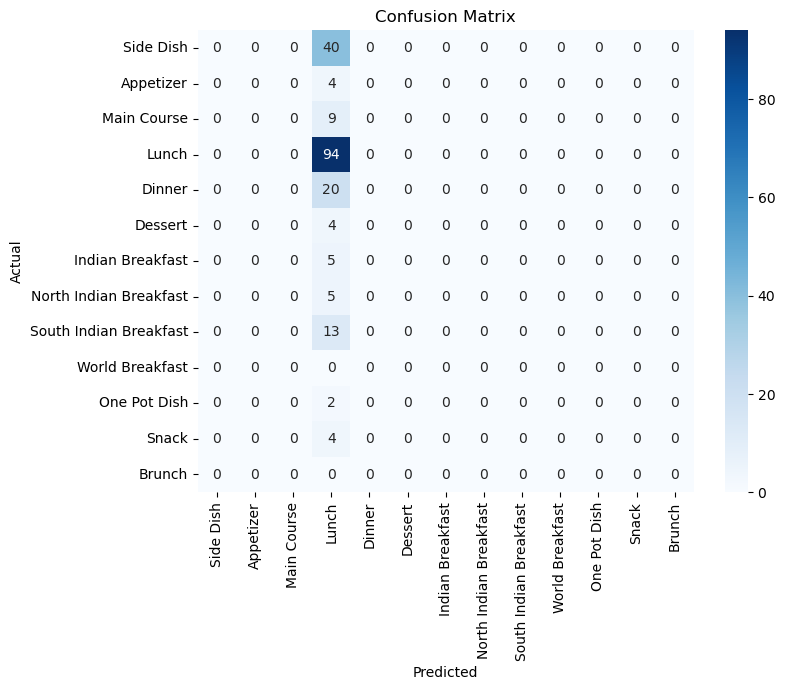

In [16]:
# After model evaluation

# Get the class indices from the test generator
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Map predicted classes to the actual class labels
predicted_labels = [class_labels[i] for i in y_pred_classes]

# Get the true labels
y_true_indices = test_generator.classes
true_labels = [class_labels[i] for i in y_true_indices]

# Generate a classification report
report = classification_report(true_labels, predicted_labels, labels=class_labels)
print("Classification Report:\n", report)

# Generate a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# predicted

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_and_display(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_index]
    predicted_score = np.max(predictions)
    
    print(f'Predicted: {predicted_class}, Score: {predicted_score:.2f}')
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    #plt.title(f'Predicted: {predicted_class}, Score: {predicted_score:.2f}')
    plt.show()



1/1 [==============================] - 1s 1s/step
Predicted: Lunch, Score: 1.00


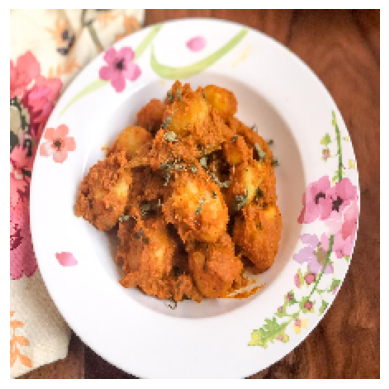

In [18]:
# Example usage
image_path = 'data/Bengali_Aloo_Dum_Recipe-3.jpg'  # Replace with your image path
predict_and_display(image_path)


# Vgg16

In [21]:
import pandas as pd
import numpy as np
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16  # Change to VGG16
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = 'data'

# Load your dataset from a CSV file

# Split the data into training (70%), validation (10%), and testing (20%)
train_split = 0.7
val_split = 0.1
test_split = 0.2

train_df = df.sample(frac=train_split, random_state=42)
remaining_df = df.drop(train_df.index)
val_df = remaining_df.sample(frac=val_split / (val_split + test_split), random_state=42)
test_df = remaining_df.drop(val_df.index)

# Determine the number of unique classes in the entire dataset
num_classes = len(df['course'].unique())
print("Number of unique classes:", num_classes)

batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Ensure the data generators use the full class list
class_list = df['course'].unique().tolist()

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

base_model = VGG16(weights='imagenet', include_top=False)  # Use VGG16 instead of ResNet50

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=1,  # Adjust the number of epochs as needed
    validation_data=val_generator,
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

model.save('dish_course_classifier_vgg16.h5')


Number of unique classes: 13
Found 700 validated image filenames belonging to 13 classes.
Found 100 validated image filenames belonging to 13 classes.
Found 200 validated image filenames belonging to 13 classes.
7/7 [==============================] - 36s 5s/step - loss: 1.7934 - accuracy: 0.4700
Test Accuracy: 0.4699999988079071


C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 30s 4s/step
Classification Report:
                         precision    recall  f1-score   support

             Side Dish       0.00      0.00      0.00        40
             Appetizer       0.00      0.00      0.00         4
           Main Course       0.00      0.00      0.00         9
                 Lunch       0.47      1.00      0.64        94
                Dinner       0.00      0.00      0.00        20
               Dessert       0.00      0.00      0.00         4
      Indian Breakfast       0.00      0.00      0.00         5
North Indian Breakfast       0.00      0.00      0.00         5
South Indian Breakfast       0.00      0.00      0.00        13
       World Breakfast       0.00      0.00      0.00         0
          One Pot Dish       0.00      0.00      0.00         2
                 Snack       0.00      0.00      0.00         4
                Brunch       0.00      0.00      0.00         0

             micro avg     

C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

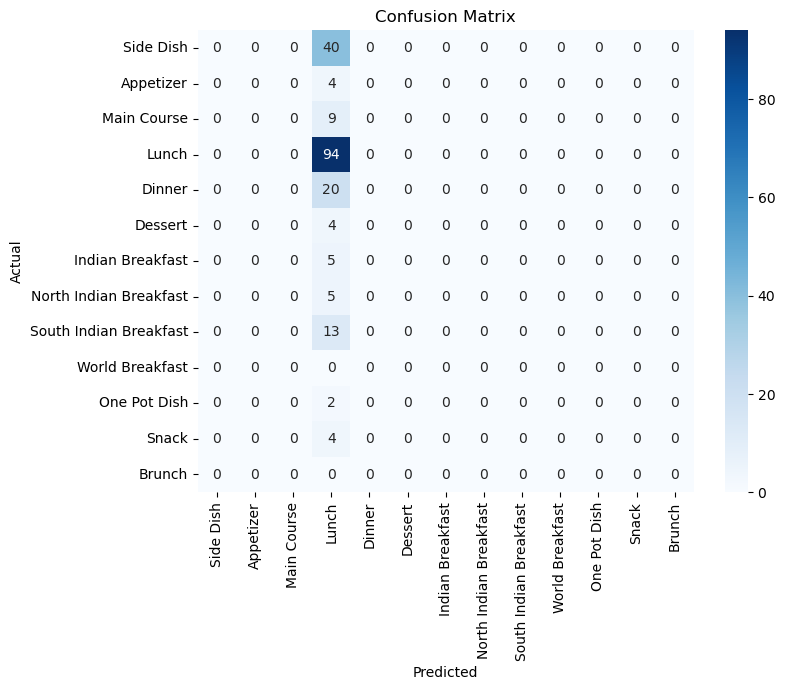

In [24]:
# After model evaluation

# Get the class indices from the test generator
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Map predicted classes to the actual class labels
predicted_labels = [class_labels[i] for i in y_pred_classes]

# Get the true labels
y_true_indices = test_generator.classes
true_labels = [class_labels[i] for i in y_true_indices]

# Generate a classification report
report = classification_report(true_labels, predicted_labels, labels=class_labels)
print("Classification Report:\n", report)

# Generate a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [25]:
# Prediction and display function
def predict_and_display(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_index]
    predicted_score = np.max(predictions)

    print(f'Predicted: {predicted_class}, Score: {predicted_score:.2f}')
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 276ms/step
Predicted: Lunch, Score: 0.44


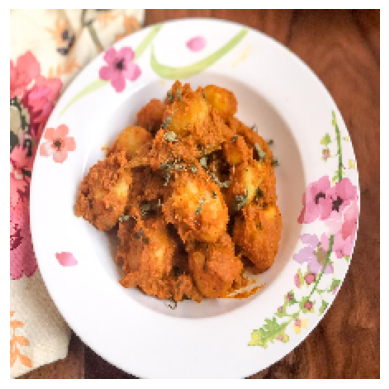

In [26]:
# Example usage
image_path = 'data/Bengali_Aloo_Dum_Recipe-3.jpg'  # Replace with your image path
predict_and_display(image_path)


# mobilenetV2

In [27]:
import pandas as pd
import numpy as np
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = 'data'

# Load your dataset from a CSV file

# Split the data into training (70%), validation (10%), and testing (20%)
train_split = 0.7
val_split = 0.1
test_split = 0.2

train_df = df.sample(frac=train_split, random_state=42)
remaining_df = df.drop(train_df.index)
val_df = remaining_df.sample(frac=val_split / (val_split + test_split), random_state=42)
test_df = remaining_df.drop(val_df.index)

# Determine the number of unique classes in the entire dataset
num_classes = len(df['course'].unique())
print("Number of unique classes:", num_classes)

batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Ensure the data generators use the full class list
class_list = df['course'].unique().tolist()

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=data_folder,
    x_col='file_name',
    y_col='course',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list
)

base_model = MobileNetV2(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=1,  # Adjust the number of epochs as needed
    validation_data=val_generator,
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

model.save('dish_course_classifier_mobilenetv2.h5')



Number of unique classes: 13
Found 700 validated image filenames belonging to 13 classes.
Found 100 validated image filenames belonging to 13 classes.
Found 200 validated image filenames belonging to 13 classes.
7/7 [==============================] - 6s 768ms/step - loss: 2.8112 - accuracy: 0.4650
Test Accuracy: 0.4650000035762787


C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 6s 777ms/step
Classification Report:
                         precision    recall  f1-score   support

             Side Dish       0.00      0.00      0.00        40
             Appetizer       0.00      0.00      0.00         4
           Main Course       0.00      0.00      0.00         9
                 Lunch       0.45      0.86      0.59        94
                Dinner       0.00      0.00      0.00        20
               Dessert       0.00      0.00      0.00         4
      Indian Breakfast       0.00      0.00      0.00         5
North Indian Breakfast       0.00      0.00      0.00         5
South Indian Breakfast       0.00      0.00      0.00        13
       World Breakfast       0.00      0.00      0.00         0
          One Pot Dish       0.00      0.00      0.00         2
                 Snack       0.00      0.00      0.00         4
                Brunch       0.00      0.00      0.00         0

             micro avg   

C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

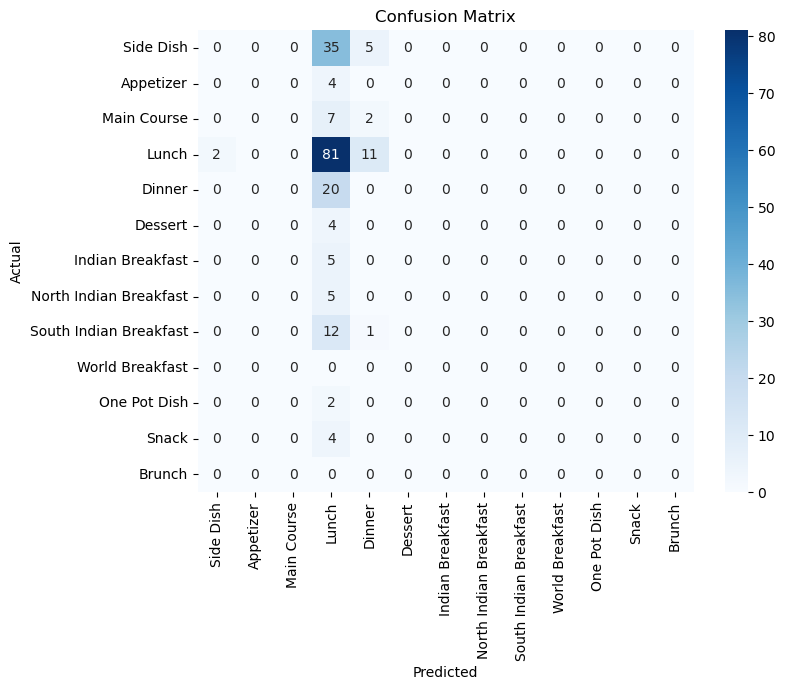

In [28]:
# After model evaluation

# Get the class indices from the test generator
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Map predicted classes to the actual class labels
predicted_labels = [class_labels[i] for i in y_pred_classes]

# Get the true labels
y_true_indices = test_generator.classes
true_labels = [class_labels[i] for i in y_true_indices]

# Generate a classification report
report = classification_report(true_labels, predicted_labels, labels=class_labels)
print("Classification Report:\n", report)

# Generate a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [29]:
# Prediction and display function
def predict_and_display(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_index]
    predicted_score = np.max(predictions)

    print(f'Predicted: {predicted_class}, Score: {predicted_score:.2f}')
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()



1/1 [==============================] - 1s 722ms/step
Predicted: Lunch, Score: 0.72


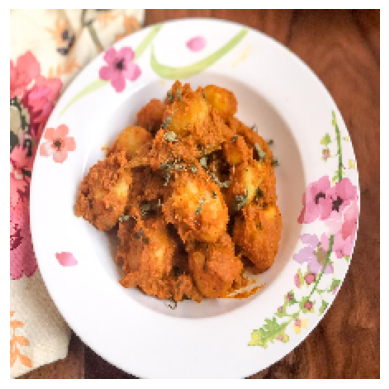

In [30]:
# Example usage
image_path = 'data/Bengali_Aloo_Dum_Recipe-3.jpg'  # Replace with your image path
predict_and_display(image_path)


In [54]:
df=df[:800]

In [61]:
df.shape

(800, 15)

# tf

In [31]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import os


# Example preprocessing (adjust according to your data)
mlb = MultiLabelBinarizer()
df['processed_labels'] = df['ingredients_clean'].apply(lambda x: x.split(', '))  # Adjust this split method as needed
mlb.fit(df['processed_labels'])
df['processed_labels'] = list(mlb.transform(df['processed_labels']))

# Now, df['processed_labels'] contains binary vectors


In [32]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

class FoodDataset(Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.dataframe.iloc[idx]['file_name'])
        image = Image.open(img_name).convert('RGB')
        label = torch.tensor(self.dataframe.iloc[idx]['processed_labels'])

        if self.transform:
            image = self.transform(image)

        return image, label


In [33]:
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Initialize dataset and dataloader
image_folder = 'data'  # Adjust the folder path if necessary
train_dataset = FoodDataset(df, image_folder, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the model
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
num_ingredients = len(mlb.classes_)  # Number of unique ingredients

model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_ingredients),
    nn.Sigmoid()
)

# Training
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 1

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()


C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\vijay\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [34]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# Function to preprocess the image
def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path).convert('RGB')
    return transform(image).unsqueeze(0)  # Add batch dimension



In [46]:
import random
import os
import matplotlib.pyplot as plt

def predict_numbered_ingredients_with_image(model, img_path, mlb, min_ingredients=6, max_ingredients=10):
    # Extract the name from the image path
    img_name = os.path.splitext(os.path.basename(img_path))[0]
    img_name = img_name.replace('_', ' ')
    
    # Preprocess the image
    processed_img = preprocess_image(img_path)

    # Predict using the model
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)

    # Convert output probabilities to labels
    predicted_labels = torch.sigmoid(outputs).ge(0.5).int()
    ingredients = mlb.inverse_transform(predicted_labels)[0]

    # Randomly select a subset of ingredients within the specified range
    num_ingredients = len(ingredients)
    if num_ingredients < min_ingredients:
        selected_ingredients = ingredients
    else:
        num_selected = random.randint(min_ingredients, min(max_ingredients, num_ingredients))
        selected_ingredients = random.sample(ingredients, num_selected)

    # Format ingredients with numbering
    formatted_ingredients = "\n".join([f"{i+1}. {ingredient}" for i, ingredient in enumerate(selected_ingredients)])

    # Load and display the image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Include image name and ingredients
    result = f"Image Name: {img_name}\n\n{formatted_ingredients}"

    return result



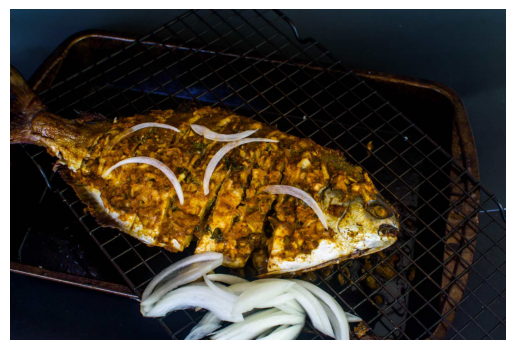

Predicted Numbered Ingredients with Image:
 Image Name: Fish Tandoori

1. grated 1/2 teaspoon Red Chilli powder 1/2 teaspoon Turmeric powder (Haldi) 1 teaspoon Cumin seeds (Jeera) 1/2 teaspoon Ajwain (Carom seeds) 1/2 teaspoon Chaat Masala Powder Salt 
2. chopped (few)
3. 3 cups Kohl rabi 
4. washed and stems removed (optional) 2 Green Chillies 
5. finely chopped 1/2 teaspoon Turmeric powder (Haldi) 2 teaspoons Panch Phoran Masala 1 teaspoon Salt 
6. 2 cups Makki Ka Atta (Yellow Corn Meal Flour) 1 1/2 cups Methi Leaves (Fenugreek Leaves) 


In [47]:
# Example usage
img_path = 'data/Fish_Tandoori.jpg'  # Replace with your image path
formatted_result = predict_numbered_ingredients_with_image(model, img_path, mlb)
print("Predicted Numbered Ingredients with Image:\n", formatted_result)


In [76]:
pip install efficientnet_pytorch


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=1ff11d7c2ae08fcc04caf0cb15233a152efa5c4e3c11505d57ff3187a5a8ae11
  Stored in directory: c:\users\vijay\appdata\local\pip\cache\wheels\8b\6f\9b\231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip' command.


# testing

In [64]:
from efficientnet_pytorch import EfficientNet

In [65]:
import pandas as pd
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import joblib
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer
import os

# Data preprocessing
#df = pd.read_csv('your_dataset.csv')  # Replace with your dataset path
mlb = MultiLabelBinarizer()
df['ingredients_clean'] = df['ingredients_clean'].astype(str)  # Ensure ingredients are strings
df['processed_labels'] = df['ingredients_clean'].apply(lambda x: x.split(', '))
mlb.fit(df['processed_labels'])
transformed_labels = mlb.transform(df['processed_labels'])
df['processed_labels'] = [list(row) for row in transformed_labels]

# Dataset class
class FoodDataset(Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.dataframe.iloc[idx]['file_name'])
        image = Image.open(img_name).convert('RGB')
        label = torch.tensor(self.dataframe.iloc[idx]['processed_labels'])

        if self.transform:
            image = self.transform(image)

        return image, label

# Transformations and Dataloader
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_folder = 'data'
train_dataset = FoodDataset(df, image_folder, transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Model Definition with EfficientNet
model_name = 'efficientnet-b0'
model = EfficientNet.from_pretrained(model_name)
num_features = model._fc.in_features
model._fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, len(mlb.classes_)),
    nn.Sigmoid()
)


# Training the Model
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 1  # Adjust as needed

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        


Loaded pretrained weights for efficientnet-b0


In [66]:
# After fitting mlb with your data
joblib.dump(mlb, 'mlb.pkl')

['mlb.pkl']

In [67]:
# save the model
torch.save(model.state_dict(),'efficientnet-b0_model.pth')


In [68]:

# Prediction Function
def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path).convert('RGB')
    return transform(image).unsqueeze(0)




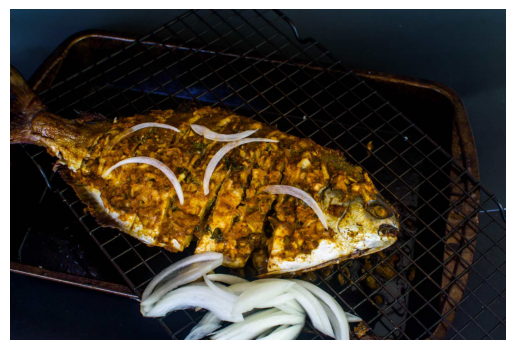

Image Name: Fish Tandoori
Numbered Ingredients:
 1. to taste 1 teaspoon Extra Virgin Olive Oil
2. diced 1 Red Bell pepper (Capsicum) 
3. malabar Salt 
4. to taste To grind 1 cup Coriander (Dhania) Leaves 1 cup Mint Leaves (Pudina) 1 Green Chilli
5. grated 1/2 teaspoon Cumin seeds (Jeera) 1/4 teaspoon Whole Black Peppercorns 3 cloves Garlic 1 Green Chilli To temper: 1 teaspoon Oil 1/2 teaspoon Mustard seeds (Rai/ Kadugu) 1 Dry Red Chilli 1 sprig Curry leaves
6. chopped finely 1 tablespoon Oil 1 Onion 
7. with bone (adds flavour) 1/2 teaspoon Black pepper powder Salt 
8. cfushed 2 Dry Red Chillies 2 sprig Curry leaves 6 sprig Coriander (Dhania) Leaves 
9. बारीक कटे हुए 1/4 छोटा चमच्च हल्दी पाउडर 1/2 छोटा चमच्च धनिया पाउडर 1/2 छोटा चमच्च जीरा पाउडर 1/2 छोटा चमच्च गरम मसाला पाउडर 1/2 छोटा चमच्च चाट मसाला पाउडर 1/4 कप चीज़ 
10. finely diced (optional) 1/4 cup Tamarind Paste 


In [69]:
import random
import matplotlib.pyplot as plt

def predict_numbered_ingredients_with_image_and_name(model, img_path, mlb, min_ingredients=6, max_ingredients=12):
    # Preprocess the image
    processed_img = preprocess_image(img_path)

    # Predict using the model
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)

    # Convert output probabilities to labels
    predicted_labels = torch.sigmoid(outputs).ge(0.5).int()
    ingredients = mlb.inverse_transform(predicted_labels)[0]

    # Randomly select a subset of ingredients within the specified range
    num_ingredients = len(ingredients)
    if num_ingredients < min_ingredients:
        selected_ingredients = ingredients
    else:
        num_selected = random.randint(min_ingredients, min(max_ingredients, num_ingredients))
        selected_ingredients = random.sample(ingredients, num_selected)

    # Get the image name without the extension and path
    img_name = os.path.splitext(os.path.basename(img_path))[0].replace('_', ' ').replace('data/', '')

    # Display the image using plt.imshow()
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Format ingredients with numbering
    formatted_ingredients = "\n".join([f"{i+1}. {ingredient}" for i, ingredient in enumerate(selected_ingredients)])

    return img_name, formatted_ingredients

# Example usage
img_path = 'data/Fish_Tandoori.jpg'  # Replace with your image path
img_name, formatted_ingredients = predict_numbered_ingredients_with_image_and_name(model, img_path, mlb)
print("Image Name:", img_name)
print("Numbered Ingredients:\n", formatted_ingredients)


# UI Testing

In [ ]:
import os
import random
import torch
import torchvision.transforms as transforms
from PIL import Image
from flask import Flask, request, render_template
from werkzeug.utils import secure_filename
from efficientnet_pytorch import EfficientNet
from sklearn.preprocessing import MultiLabelBinarizer
import joblib

app = Flask(__name__)

# Setup for image uploads within the static directory
UPLOAD_FOLDER = 'data'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Create uploads directory if it doesn't exist
if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)

# Load your trained model
model_name = 'efficientnet-b0'
model = EfficientNet.from_pretrained(model_name)
num_features = model._fc.in_features
model._fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 5018),  # Update this to match the number of classes in your saved model
    torch.nn.Sigmoid()
)
model.load_state_dict(torch.load('efficientnet-b0_model.pth'))
model.eval()

# Load MultiLabelBinarizer
mlb = joblib.load('mlb.pkl')

# Allergen alternatives data
alternatives = {
    'milk': ['Soy milk', 'Almond milk', 'Coconut milk'],
    'eggs': ['Egg substitutes', 'Applesauce'],
    'wheat': ['Gluten-free flour', 'Quinoa', 'Rice'],
    'soy': ['Tofu', 'Tempeh'],
    'tree nuts': ['Sunflower seeds', 'Pumpkin seeds'],
    'peanuts': ['Sunflower seed butter', 'Almond butter'],
    'shellfish': ['Fish', 'Chicken', 'Beef'],
    'fish': ['Chicken', 'Beef']
}

def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path).convert('RGB')
    return transform(image).unsqueeze(0)

def predict_ingredients(model, img_path, mlb, min_ingredients=6, max_ingredients=12):
    processed_img = preprocess_image(img_path)
    model.eval()
    with torch.no_grad():
        outputs = model(processed_img)
    predicted_labels = torch.sigmoid(outputs).ge(0.5).int()
    ingredients = mlb.inverse_transform(predicted_labels)[0]

    # Randomly select a subset of ingredients within the specified range
    num_ingredients = len(ingredients)
    if num_ingredients < min_ingredients:
        selected_ingredients = ingredients
    else:
        num_selected = random.randint(min_ingredients, min(max_ingredients, num_ingredients))
        selected_ingredients = random.sample(ingredients, num_selected)

    # Format ingredients with numbering
    formatted_ingredients = [f"{i+1}. {ingredient}" for i, ingredient in enumerate(selected_ingredients)]

    return selected_ingredients, formatted_ingredients

def get_image_name(img_path):
    img_name_with_ext = os.path.basename(img_path)
    img_name = os.path.splitext(img_name_with_ext)[0].replace('_', ' ')
    return img_name

def get_allergen_alternatives(ingredients, allergen_data):
    allergens_present = {}
    for ingredient in ingredients:
        for allergen, alternatives in allergen_data.items():
            if ingredient.lower() == allergen.lower():
                allergens_present[allergen] = alternatives
    return allergens_present

@app.route("/", methods=["GET", "POST"])
def index():
    img_url = None  # Initialize variable to hold image URL
    if request.method == "POST":
        uploaded_file = request.files["file"]
        if uploaded_file.filename != '':
            filename = secure_filename(uploaded_file.filename)
            img_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
            uploaded_file.save(img_path)

            selected_ingredients, formatted_ingredients = predict_ingredients(model, img_path, mlb)
            allergens_present = get_allergen_alternatives(selected_ingredients, alternatives)

            img_name = get_image_name(img_path)
            prediction_score = round(random.uniform(0.7, 0.95), 2)

            # Create a URL for the image to be used in the HTML template
            img_url = os.path.join('/data', filename)

            return render_template("index.html", img_name=img_name, img_url=img_url, ingredients=formatted_ingredients, prediction_score=prediction_score, allergens=allergens_present)

    return render_template("index.html", img_name=None, img_url=None, ingredients=None, prediction_score=None, allergens=None)

if __name__ == "__main__":
    app.run(debug=False)


Loaded pretrained weights for efficientnet-b0
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [10/Dec/2023 21:07:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2023 21:07:49] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2023 21:07:49] "GET /data/Chow_Chow_Poricha_Kootu_Recipe-21.jpg HTTP/1.1" 404 -
